<a href="https://colab.research.google.com/github/ghadikq/SDA_Files/blob/main/Ghadi_WeekendProject_01_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [ ]:
import pandas as pd

raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


# **Explor Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [ ]:
df.shape

(6338, 21)

## ***Check Predict Variable (Target)***

In [ ]:
# see Churn values
df.Churn.unique()

array(['Yes', 'No'], dtype=object)

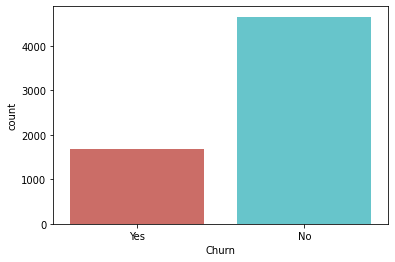

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x='Churn', data=df ,palette='hls')
plt.show()

In [ ]:
count_no_Churn = len(df[df['Churn']=='No'])
count_Churn = len(df[df['Churn']=='Yes'])

pct_of_no_Churn = count_no_Churn/(count_no_Churn + count_Churn)
print("Percentage of no Churn is", round(pct_of_no_Churn * 100) ,'%')

pct_of_Churn = count_Churn/(count_no_Churn + count_Churn)
print("Percentage of yes Churn", round(pct_of_Churn*100) ,'%')

Percentage of no Churn is 73 %
Percentage of yes Churn 27 %


In [ ]:
# See mean for numeric columns 
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128817,37.498280,61.610935
Yes,0.252370,17.919431,74.273045


# ***Clean Data Features***

I used 3 different way to transform data values to numbers depending on data values 


*   Direct
*   Use get_dummies
*   Use feature_extraction 



In [ ]:
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,3272-VUHPV,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


In [ ]:
# check value for TotalCharges column to fix its type if need to
df.TotalCharges.unique()
len(df.TotalCharges.unique())


5921

TotalCharges has object type but its value is numeric so need to convert column type to numeric

In TotalCharges column there is a value has space " " so this has this error

` ValueError: Unable to parse string " " at position 3046`

So I change it to 0 using loc

In [ ]:
# change " " to 0 
df['TotalCharges'].loc[df['TotalCharges'] ==  " "] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# check if value change correctly using index provided in error
# df['TotalCharges'].iloc[[3046,3182,3525,4002,4378,4773,5570,5630]]

Now can change column type

In [ ]:
# convert column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

### Change columns values to 0/1


In [ ]:
# run code for each column to check its values 
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# How columns look before 
df[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']].head(3)

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Yes,No,No,Yes,Yes
1,No,Yes,Yes,No,No
2,Yes,Yes,Yes,Yes,No


In [ ]:
# change values from yes/no to 0/1
df.Partner = df.Partner.map(dict(Yes=1, No=0))
df.Dependents = df.Dependents.map(dict(Yes=1, No=0))
df.PhoneService = df.PhoneService.map(dict(Yes=1, No=0))
df.PaperlessBilling = df.PaperlessBilling.map(dict(Yes=1, No=0))
df.Churn = df.Churn.map(dict(Yes=1, No=0))

# Other way 
# df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0}).astype(int) 

In [ ]:
# How columns look after 
df[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']].head(3)

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,1
1,0,1,1,0,0
2,1,1,1,1,0


## Categorical Features using get_dummies

*   gender
*   MultipleLines	
*   InternetService	
*   OnlineSecurity	
*   OnlineBackup	
*   DeviceProtection	
*   TechSupport	
*   StreamingTV	
*   StreamingMovies	
*   Contract 
*   PaymentMethod


In [ ]:
# How columns look before 
df[['gender', 'MultipleLines' ,'InternetService','OnlineSecurity' , 'OnlineBackup' ,'DeviceProtection' ,'TechSupport','StreamingTV','StreamingMovies' ,'Contract' ,'PaymentMethod']].head(3)

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,Female,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Electronic check
1,Male,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic)
2,Female,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Credit card (automatic)


In [ ]:
# use value_counts to see each catagory with its count for each column [to help understand data better]
df['MultipleLines'].value_counts()

df['PaymentMethod'].value_counts()


Electronic check             2150
Mailed check                 1424
Bank transfer (automatic)    1386
Credit card (automatic)      1378
Name: PaymentMethod, dtype: int64

In [ ]:
# use get_dummies on column 
pd.get_dummies(df['MultipleLines']).head(3)

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,0,0,1


In [ ]:
# use get_dummies on column
pd.get_dummies(df['InternetService']).head(3)

,DSL,Fiber optic,No
0,1,0,0
1,0,0,1
2,0,1,0


Can't use this way since there will be multiple columns named yes and no so need to use diffrent way with the columns that has yes/no values.

**But can use get_dummies on gender, PaymentMethod and Contract columns**

In [ ]:
# use get_dummies on column and store it to data frame to concat it latter 
gender_df = pd.get_dummies(df['gender'])
gender_df.head(3)

,Female,Male
0,1,0
1,0,1
2,1,0


In [ ]:
# use get_dummies on column and store it to data frame to concat it latter 
PaymentMethod_df = pd.get_dummies(df['PaymentMethod'])
PaymentMethod_df.head(3)

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0


In [ ]:
# use get_dummies on column and store it to data frame to concat it latter 
Contract_df = pd.get_dummies(df['Contract'])
Contract_df.head(3)

,Month-to-month,One year,Two year
0,1,0,0
1,0,0,1
2,1,0,0


## Categorical Features using feature_extraction

**get_dummies will not work since there is replicated yes/no for different catagories**

So I use feature_extraction instead

### MultipleLines Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'MultipleLines':v} for v in df.MultipleLines]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'MultipleLines':v} for v in df.MultipleLines]

t = vec.fit_transform(data)
names = vec.feature_names_

MultipleLines_df = pd.DataFrame(t, columns=names)
MultipleLines_df.head(3)

,MultipleLines=No,MultipleLines=No phone service,MultipleLines=Yes
0,0,1,0
1,1,0,0
2,0,0,1


### InternetService Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'InternetService':v} for v in df.InternetService]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'InternetService':v} for v in df.InternetService]

t = vec.fit_transform(data)
names = vec.feature_names_

InternetService_df = pd.DataFrame(t, columns=names)
InternetService_df.head(3)

,InternetService=DSL,InternetService=Fiber optic,InternetService=No
0,1,0,0
1,0,0,1
2,0,1,0


### OnlineSecurity Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'OnlineSecurity':v} for v in df.OnlineSecurity]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'OnlineSecurity':v} for v in df.OnlineSecurity]

t = vec.fit_transform(data)
names = vec.feature_names_

OnlineSecurity_df = pd.DataFrame(t, columns=names)
OnlineSecurity_df.head(3)

,OnlineSecurity=No,OnlineSecurity=No internet service,OnlineSecurity=Yes
0,1,0,0
1,0,1,0
2,1,0,0


### OnlineBackup Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'OnlineBackup':v} for v in df.OnlineBackup]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'OnlineBackup':v} for v in df.OnlineBackup]

t = vec.fit_transform(data)
names = vec.feature_names_

OnlineBackup_df = pd.DataFrame(t, columns=names)
OnlineBackup_df.head(3)

,OnlineBackup=No,OnlineBackup=No internet service,OnlineBackup=Yes
0,1,0,0
1,0,1,0
2,1,0,0


### DeviceProtection Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'DeviceProtection':v} for v in df.DeviceProtection]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'DeviceProtection':v} for v in df.DeviceProtection]

t = vec.fit_transform(data)
names = vec.feature_names_

DeviceProtection_df = pd.DataFrame(t, columns=names)
DeviceProtection_df.head(3)

,DeviceProtection=No,DeviceProtection=No internet service,DeviceProtection=Yes
0,0,0,1
1,0,1,0
2,1,0,0


### TechSupport Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'TechSupport':v} for v in df.TechSupport]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'TechSupport':v} for v in df.TechSupport]

t = vec.fit_transform(data)
names = vec.feature_names_

TechSupport_df = pd.DataFrame(t, columns=names)
TechSupport_df.head(3)

,TechSupport=No,TechSupport=No internet service,TechSupport=Yes
0,1,0,0
1,0,1,0
2,0,0,1


### StreamingTV Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'StreamingTV':v} for v in df.StreamingTV]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'StreamingTV':v} for v in df.StreamingTV]

t = vec.fit_transform(data)
names = vec.feature_names_

StreamingTV_df = pd.DataFrame(t, columns=names)
StreamingTV_df.head(3)

,StreamingTV=No,StreamingTV=No internet service,StreamingTV=Yes
0,0,0,1
1,0,1,0
2,0,0,1


### StreamingMovies Column

In [ ]:
# Transform categorical column and store it in df
from sklearn.feature_extraction import DictVectorizer

d = [{'StreamingMovies':v} for v in df.StreamingMovies]

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'StreamingMovies':v} for v in df.StreamingMovies]

t = vec.fit_transform(data)
names = vec.feature_names_

StreamingMovies_df = pd.DataFrame(t, columns=names)
StreamingMovies_df.head(3)

,StreamingMovies=No,StreamingMovies=No internet service,StreamingMovies=Yes
0,1,0,0
1,0,1,0
2,0,0,1


## Combine data frames

Combine data into a new dataframe containing all expanded columns



1.   Drop old categorical columns 
2.   Combine original df with new created df 



In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,1,0,18,0,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,1,Electronic check,39.05,669.85,1
1,1764-VUUMT,Male,0,0,1,66,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),19.95,1269.10,0
2,0089-IIQKO,Female,0,1,1,39,1,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,1,Credit card (automatic),99.95,3767.40,0
3,1960-UYCNN,Male,0,0,0,10,1,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,1,Electronic check,95.25,1021.55,0
4,8224-IVVPA,Female,0,0,0,27,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,56.70,1652.95,0


In [ ]:
# drop old columns 
df = df.drop(columns=['gender', 'MultipleLines' ,'InternetService','OnlineSecurity' , 'OnlineBackup' ,'DeviceProtection' ,'TechSupport','StreamingTV','StreamingMovies' ,'Contract' ,'PaymentMethod'])
df.head(3)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,0,1,0,18,0,1,39.05,669.85,1
1,1764-VUUMT,0,0,1,66,1,0,19.95,1269.10,0
2,0089-IIQKO,0,1,1,39,1,1,99.95,3767.40,0


In [ ]:
# Combine all df in one new df for ML
ML_df = pd.concat([df,gender_df , PaymentMethod_df, Contract_df, MultipleLines_df, InternetService_df, OnlineSecurity_df, OnlineBackup_df, DeviceProtection_df, TechSupport_df, StreamingTV_df, StreamingMovies_df], axis=1)

ML_df.head(3)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Female,Male,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year,MultipleLines=No,MultipleLines=No phone service,MultipleLines=Yes,InternetService=DSL,InternetService=Fiber optic,InternetService=No,OnlineSecurity=No,OnlineSecurity=No internet service,OnlineSecurity=Yes,OnlineBackup=No,OnlineBackup=No internet service,OnlineBackup=Yes,DeviceProtection=No,DeviceProtection=No internet service,DeviceProtection=Yes,TechSupport=No,TechSupport=No internet service,TechSupport=Yes,StreamingTV=No,StreamingTV=No internet service,StreamingTV=Yes,StreamingMovies=No,StreamingMovies=No internet service,StreamingMovies=Yes
0,5087-SUURX,0,1,0,18,0,1,39.05,669.85,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
1,1764-VUUMT,0,0,1,66,1,0,19.95,1269.10,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0089-IIQKO,0,1,1,39,1,1,99.95,3767.40,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
# New df dimension 
ML_df.shape

(6338, 43)

In [ ]:
# Check columns types
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            6338 non-null   object 
 1   SeniorCitizen                         6338 non-null   int64  
 2   Partner                               6338 non-null   int64  
 3   Dependents                            6338 non-null   int64  
 4   tenure                                6338 non-null   int64  
 5   PhoneService                          6338 non-null   int64  
 6   PaperlessBilling                      6338 non-null   int64  
 7   MonthlyCharges                        6338 non-null   float64
 8   TotalCharges                          6338 non-null   float64
 9   Churn                                 6338 non-null   int64  
 10  Female                                6338 non-null   uint8  
 11  Male             

Now all columns values are numeric so I can apply ML Model

## **Setting up a simple Logistic Regression**

[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

### Split the data into training and testing sets

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X = ML_df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Fit the model...

Note: I skipped a step in setting up the data...

### Fit a simple logistic regression model

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions...

### Prediction

In [ ]:
lr.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
# save to var
preds = lr.predict(X_test)

From here you'd...

1. Figure our your precision, recall, score, etc..
2. Make it into a pipeline... ([Docs Help](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) | [Basic Skeleton Code Help](https://github.com/gumdropsteve/intro_to_machine_learning/blob/main/day_03/02_assignment.ipynb))
3. Figure out your best hyperparams (GridSearchCV)...
4. Make that model...
5. ...

##  **precision, recall, score**

### Precision

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, preds)

0.7004608294930875

### Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, preds)

0.579047619047619

### MSE

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds)

0.18454258675078863

## **Pipeline**

In [ ]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'logisticregression__solver' : ['lbfgs', 'liblinear'],
               'logisticregression__penalty': ['none', 'l1', 'l2', 'elasticnet'],
               'logisticregression__C'      : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
               'logisticregression__multi_class': ['auto', 'ovr', 'multinomial']
             } 
grid = GridSearchCV(LR(), param_grid, cv=7)

In [ ]:
# fit the grid
grid.fit(X, y)

In [ ]:
# show best params
print('Best Hyperparameters:')
grid.best_params_

Best Hyperparameters:


{'logisticregression__C': 0.1,
 'logisticregression__multi_class': 'auto',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [ ]:
# find r2score
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=preds)

0.07652661064425736

In [ ]:
from sklearn.metrics import confusion_matrix
# also use confusion matrix to see prediction results/preformance 
logconfusion_matrix = confusion_matrix(y_test, preds)
print(logconfusion_matrix)

[[1247  130]
 [ 221  304]]


In [ ]:
from sklearn.metrics import classification_report

# check the result by having classification report for model
print(classification_report(y_test,preds)) # acuracy is 93%

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1377
           1       0.70      0.58      0.63       525

    accuracy                           0.82      1902
   macro avg       0.77      0.74      0.76      1902
weighted avg       0.81      0.82      0.81      1902



#### **For this model the best parameters is the default so no need to change model parameters**

## **Redo model with new hyperparameters**

Just to check if change the parameters values will affect the model 

In [ ]:
# default paramters is also best parameters for this model
# lr = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='lbfgs')

lr2 = LogisticRegression(C=0.5, multi_class='multinomial', penalty='l1', solver='saga')

lr.fit(X_train, y_train)
preds2 = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logconfusion_matrix = confusion_matrix(y_test, preds2)
print(logconfusion_matrix)

[[1247  130]
 [ 221  304]]


In [ ]:
from sklearn.metrics import classification_report

# check the result by having classification report for model
print(classification_report(y_test,preds)) # acuracy is 93%

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1377
           1       0.70      0.58      0.63       525

    accuracy                           0.82      1902
   macro avg       0.77      0.74      0.76      1902
weighted avg       0.81      0.82      0.81      1902



Even after change parameters the result didn't change that much so no need to change it 

Use best parameters that found by grid search